# Классификация рукописных цифр для задачи классификации(0-9)

### Импорт библиотек

In [1]:
import keras # library for creating NNs
from keras.datasets import mnist 
import matplotlib.pyplot as plt # For visualization
import netron # Library for visual representation of the model

### 1) Load the data 

In [2]:
dataset = mnist.load_data()
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Print the shape of the dataset
print('Training data shape:', x_train.shape)
print('Training labels shape:', y_train.shape)
print('Testing data shape:', x_test.shape)
print('Testing labels shape:', y_test.shape)
dataset

Training data shape: (60000, 28, 28)
Training labels shape: (60000,)
Testing data shape: (10000, 28, 28)
Testing labels shape: (10000,)


((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

### 2) Preprocess the data

In [3]:
# Reshape the data to a 4D tensor
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# Scale pixel values to be between 0 and 1
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# One-hot encode the labels
num_classes = 10

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

### 3) Define the model architecture

In [4]:
model = keras.Sequential([
    keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(num_classes, activation='softmax')
])

# 4) Model compile

In [5]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 5) Train the model

Epoch 1/10
235/235 [==============================] - 14s 60ms/step - loss: 0.0976 - accuracy: 0.9712 - val_loss: 0.0437 - val_accuracy: 0.9854
Epoch 2/10
235/235 [==============================] - 14s 61ms/step - loss: 0.0764 - accuracy: 0.9770 - val_loss: 0.0381 - val_accuracy: 0.9874
Epoch 3/10
235/235 [==============================] - 13s 54ms/step - loss: 0.0641 - accuracy: 0.9807 - val_loss: 0.0317 - val_accuracy: 0.9892
Epoch 4/10
235/235 [==============================] - 13s 53ms/step - loss: 0.0541 - accuracy: 0.9843 - val_loss: 0.0288 - val_accuracy: 0.9912
Epoch 5/10
235/235 [==============================] - 13s 53ms/step - loss: 0.0486 - accuracy: 0.9854 - val_loss: 0.0293 - val_accuracy: 0.9905
Epoch 6/10
235/235 [==============================] - 12s 51ms/step - loss: 0.0428 - accuracy: 0.9873 - val_loss: 0.0266 - val_accuracy: 0.9908
Epoch 7/10
235/235 [==============================] - 12s 49ms/step - loss: 0.0406 - accuracy: 0.9877 - val_loss: 0.0253 - val_accuracy:

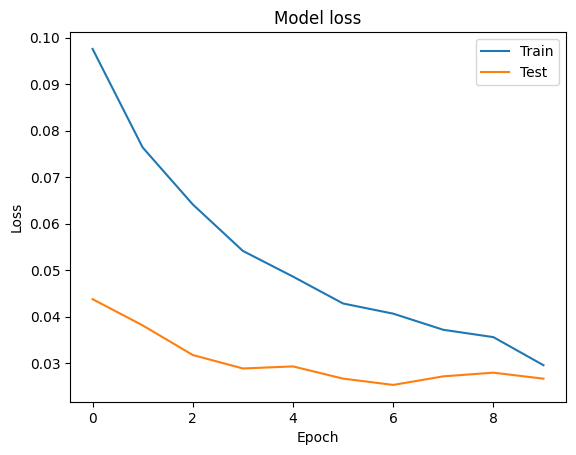

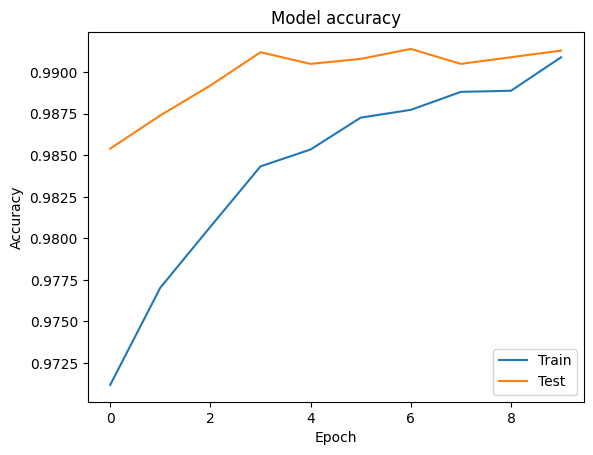

In [7]:
batch_size = 256 # Количество используемых объектов за одну итерацию при обучении
epochs = 10 # Количество периодов обучения

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))

# Plot the training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

# Plot the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

# 6) Evaluation

In [8]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.02662627212703228
Test accuracy: 0.9912999868392944


In [9]:
model.save('mnist_model.h5')
netron.start('mnist_model.h5')

Serving 'mnist_model.h5' at http://localhost:8080


('localhost', 8080)

# Тапсырма: 
### Жасалған модельдің резлультаттарын шығару
### 1) Classification report 
### 2) Confusion matrix 